In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from prob_rob.motion_models import OdometryMotionModel
from prob_rob.data import read_simple_world, read_simple_data
from prob_rob.utils import normalize_angle, sample_normal_distribution
from prob_rob.robot import BaseRobot
from prob_rob.map import LandmarkMap

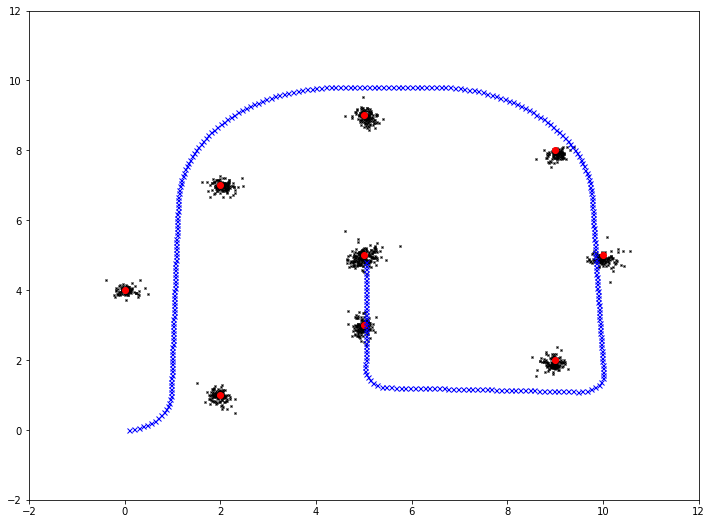

In [3]:
robot = BaseRobot(0, 0, 0)
motion_model = OdometryMotionModel(robot.pose)
robot.motion = motion_model

odometry, sensor = read_simple_data('./data/simple/sensor_data.dat')
landmarks = read_simple_world('./data/simple/world.dat')

landmark_map = LandmarkMap(landmarks)
commands = [np.array(odom).T for odom in odometry]

# Plot true robot path
x = []
y = []
meas_x = []
meas_y = []

plt.figure(figsize=(12, 9))
plt.xlim((-2, 12))
plt.ylim((-2, 12))

for key, value in landmark_map.landmarks.items():
    plt.plot(value[0], value[1], 'ro')

for command, readings in zip(commands, sensor):  
    robot.motion_command(command)
    
    rx = robot.pose.item(0)
    ry = robot.pose.item(1)
    rtheta = normalize_angle(robot.pose.item(2))
    
    for reading in readings:
        lid, srange, sbearing = reading
        
        olx = rx + srange * math.cos(sbearing + rtheta)
        oly = ry + srange * math.sin(sbearing + rtheta)
        
        meas_x.append(olx)
        meas_y.append(oly)
    
    x.append(rx)
    y.append(ry)
    
plt.plot(x, y, 'bx', markersize=5, zorder=2)
plt.plot(meas_x, meas_y, 'kx', markersize=2, zorder=1)